<a href="https://colab.research.google.com/github/mallisha/dataset/blob/main/training_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Clone Datasets

In [ ]:
! git clone https://github.com/mallisha/dataset.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import os
main_dir = '/content/dataset/xray'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'covid')
train_normal_dir = os.path.join(train_dir,'normal')
train_viral_dir = os.path.join(train_dir,'viral')
test_covid_dir = os.path.join(test_dir,'covid')
test_normal_dir = os.path.join(test_dir,'normal')
test_viral_dir = os.path.join(test_dir,'viral')

In [ ]:
print(train_dir,train_covid_dir,train_viral_dir)

/content/dataset/xray\train /content/dataset/xray\train\covid /content/dataset/xray\train\viral


In [ ]:
print(test_dir,test_covid_dir,test_viral_dir)

/content/dataset/xray\test /content/dataset/xray\test\covid /content/dataset/xray\test\viral


In [ ]:
category_names = sorted(os.listdir('/content/dataset/xray/train'))
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_viral_names = os.listdir(train_viral_dir)
print(train_viral_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

test_viral_names = os.listdir(test_viral_dir)
print(test_viral_names[:10])

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/dataset/xray/train'

In [ ]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("train dataset viral images :",len(train_viral_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("test dataset viral images :",len(test_viral_names))
print("Total train images :",len(train_covid_names+train_normal_names+train_viral_names))
print("Total test images :",len(test_covid_names+test_normal_names+test_viral_names))

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

# Generating Training , Validation & Testing Batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   )

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (64,64),
                                                    subset = 'training',
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (64,64),
                                                    subset = 'validation',
                                                    batch_size = 64,
                                                    class_mode = 'categorical')



FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/dataset/xray\\train'

In [ ]:
train_generator.class_indices

In [ ]:

train_generator.image_shape

NameError: name 'train_generator' is not defined

In [ ]:
#train_generator=tf.keras.utils.normalize(train_generator, axis=1)

# Build CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(2,2),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

# Compile & Train Model

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator,
                              epochs=30,
                              validation_data = validation_generator,
                                                  validation_steps = 10)

In [ ]:
history.history.keys()

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_dir,
     target_size=(64, 64),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
test_loss , test_acc = model.evaluate(test_data_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

In [ ]:
test_it=test_data_generator;
y_true=test_it.classes;
y_pred = predicted_classes
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))


print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=['covid', 'normal', 'pneumonia']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


UnidentifiedImageError: ignored

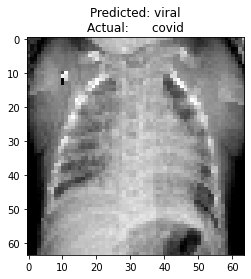

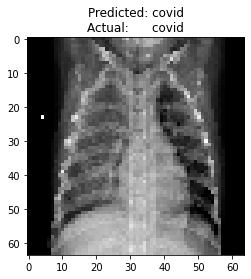

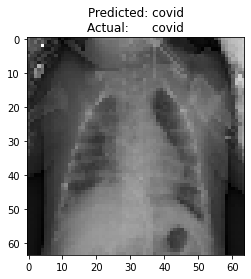

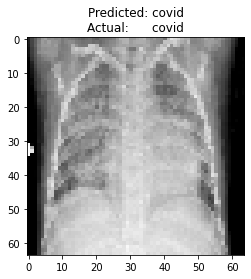

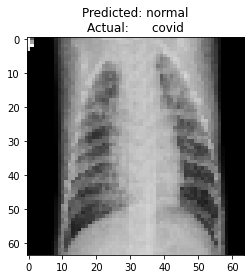

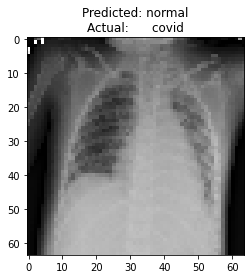

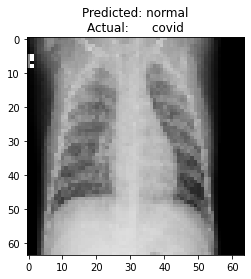

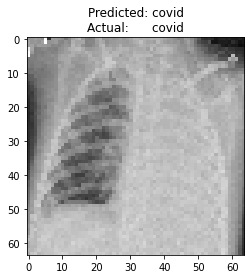

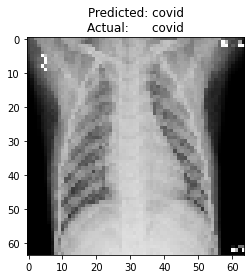

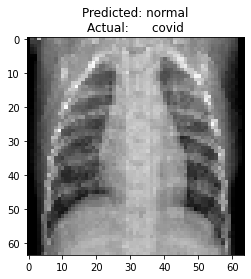

In [ ]:
import numpy as np
import matplotlib.pyplot as plt3
#from google.colab import files
from keras.preprocessing import image
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

img_nr = 0
for subdir, dirs, files in os.walk('dataset/xray/test'):
    for file in files:
        img_file = subdir + '/' + file
        Image = load_img(img_file,target_size=(64,64))
        Y_pred = model.predict_generator(test_generator)
        y_pred = np.argmax(Y_pred, axis=1)
        pred_emotion = category_names[y_pred[img_nr]]
        real_emotion = category_names[test_generator.classes[img_nr]]
        plt.figure()
        plt.title('Predicted: ' + pred_emotion + '\n' + 'Actual:      ' + real_emotion)
        plt.imshow(Image)
        img_nr = img_nr +1

In [ ]:
from keras.preprocessing import image
y_actual =[]

y_test =[]

for i in os.listdir("/content/dataset/xray/test/covid"):
  img = image.load_img("/content/dataset/xray/test/covid/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

for i in os.listdir("/content/dataset/xray/test_dir/normal"):
  img = image.load_img("/content/dataset/xray/test_dir/normal/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

for i in os.listdir("/content/dataset/xray/test_dir/viral"):
  img = image.load_img("/content/dataset/xray/test_dir/viral/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(2)

y_actual = np.array(y_actual)

y_test = np.array(y_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_actual,y_test)

import seaborn as sns

sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)

from sklearn import metrics

print(metrics.classification_report(y_actual,y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


IndexError: ignored

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(64,64))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict_classes(images,batch_size=10)
  #classes = np.argmax(model.predict(x), axis=-1)

  print(fn)

  if classes==0:
    print('Covid19')
  elif classes==1:
    print('Normal')
  else :
    print('Viral Pneumonia')

KeyboardInterrupt: ignored

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')